In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = r"Data\\"

In [3]:
from TransformData import transform_data
data_generator = transform_data(path = path + 'train.csv')
data = data_generator.get_data(train_or_analysis = 'analysis')

## Hypothesis

### Houses with a larger lot size (LotArea) generally have a higher sale price.

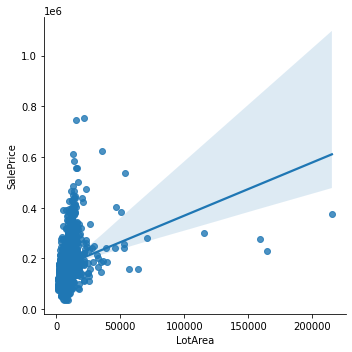

In [4]:
sns.lmplot(data = data, x = 'LotArea', y = 'SalePrice')

In [5]:
np.corrcoef(data['LotArea'], data['SalePrice'])[0,1]

0.2638433538714056

### Houses with a paved road access (Street) typically sell for more than those with a gravel road access.

<AxesSubplot: xlabel='Street', ylabel='SalePrice'>

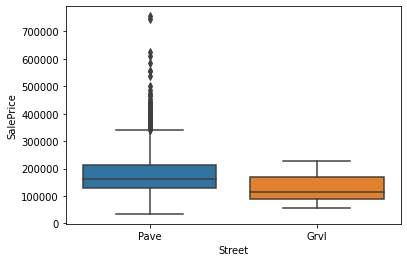

In [6]:
sns.boxplot(data = data, x = 'Street', y = 'SalePrice')

In [7]:
l = len(data)
street_count = data.groupby('Street')['Id'].count().reset_index().rename({'Id': 'Count'}, axis  = 1)
street_count['Pct_total'] = street_count['Count'] / l * 100
street_count

,Street,Count,Pct_total
0,Grvl,6,0.410959
1,Pave,1454,99.589041


As we can see, there's a difference between the prices but as almost all Streets are Paved we can't rely on this assumption

### Houses that are newer (YearBuilt) generally sell for more than older houses.

Text(1990, 140921.19589041095, '1985')

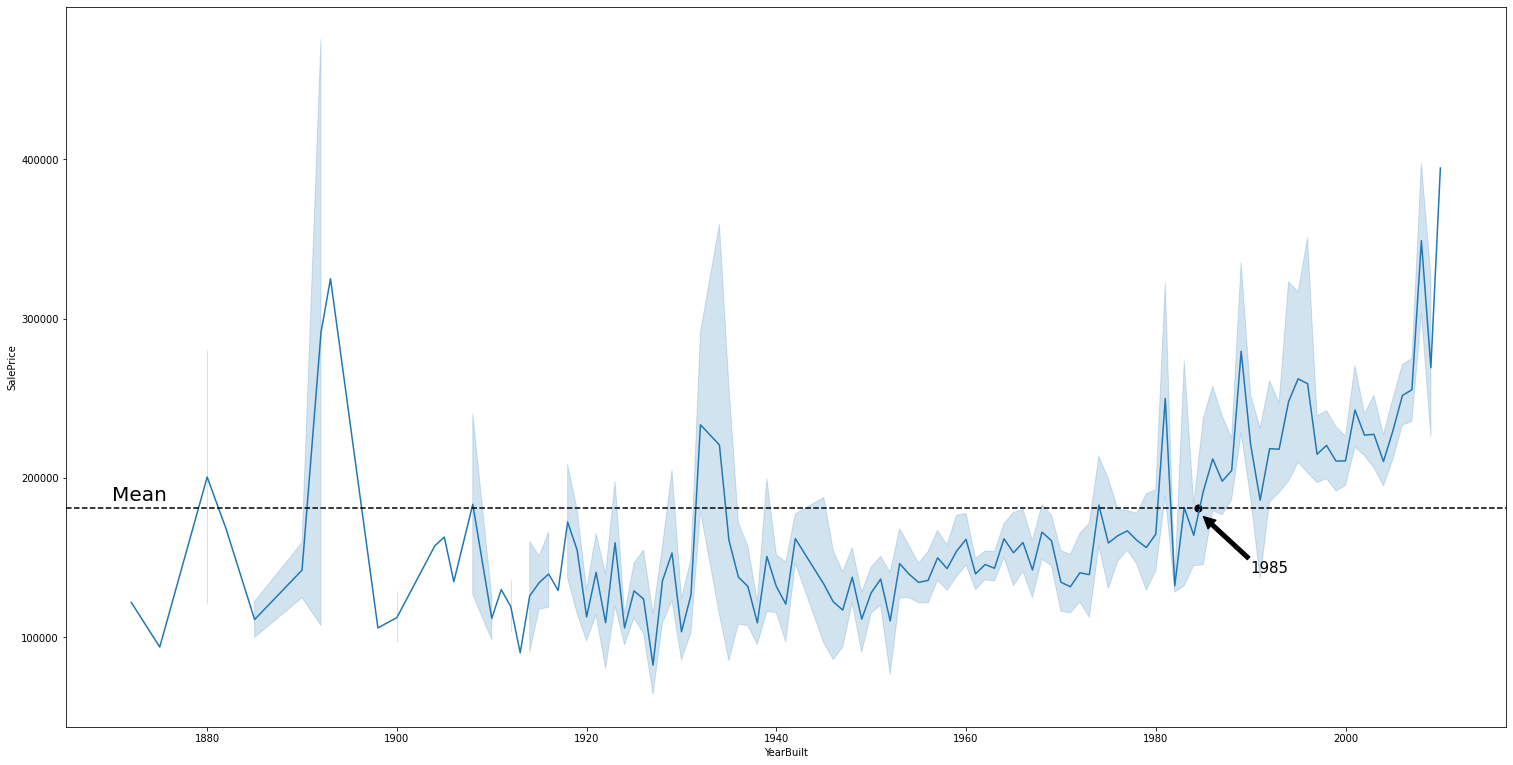

In [8]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data = data, x = 'YearBuilt', y = 'SalePrice', markevery=1985)
ax.axhline(np.mean(data['SalePrice']), color = 'k', linestyle = '--')
ax.annotate('Mean', xy = (1870, np.mean(data['SalePrice'] + 5000)), fontsize = 20)
plt.scatter(x = 1984.5, y = np.mean(data['SalePrice']), marker='.', c='black', s = 200)
ax.annotate('1985', xy=(1985, np.mean(data['SalePrice'] - 5000)), xytext=(1990, np.mean(data['SalePrice'] - 40000)),
            arrowprops=dict(facecolor='black'), fontsize = 15)

We see that after ~1985 almost all the houses are above average price, which means that new houses cost more

### Houses with a larger living area (GrLivArea) usually have a higher sale price.

<Figure size 1440x720 with 0 Axes>

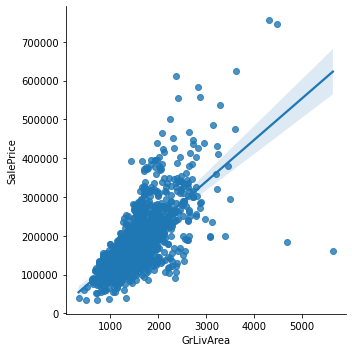

In [9]:
fig = plt.figure(figsize=(20,10))
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = data)


In [10]:
np.corrcoef(data['GrLivArea'], data['SalePrice'])[0,1]

0.7086244776126521

There's a very strong correlation between the variables, which is proof that large living area houses cost more

### Houses with more garage space (GarageCars) tend to have a higher sale price.

<AxesSubplot: xlabel='GarageCars', ylabel='SalePrice'>

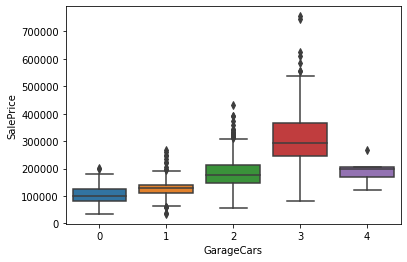

In [11]:
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = data)

In [12]:
data.groupby('GarageCars').count()['Id']

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: Id, dtype: int64

It is possible to see growth in price in almost all Garage Spaces, 4 cars has only 5 datapoint so it is not reliable

### Houses with more bedrooms (BedroomAbvGr) usually have a higher sale price.

<AxesSubplot: xlabel='BedroomAbvGr', ylabel='SalePrice'>

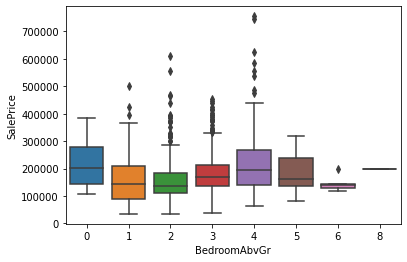

In [13]:
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = data)

In [14]:
data.groupby('BedroomAbvGr').count()['Id']

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

## Analysing SalePrice distribution

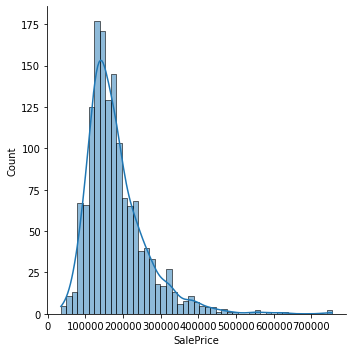

In [15]:
sns.displot(data.SalePrice, kde = True)

We can see that the distribution of prices is not normal, having some outliers after 500000

Let's try to remove those

In [16]:
qtd_data_loss = data.loc[data.SalePrice > 500000].count()['Id'] / l * 100
print('If we remove outliers above 500k we will lose %.2f pct of our dataset' %qtd_data_loss)

If we remove outliers above 500k we will lose 0.62 pct of our dataset


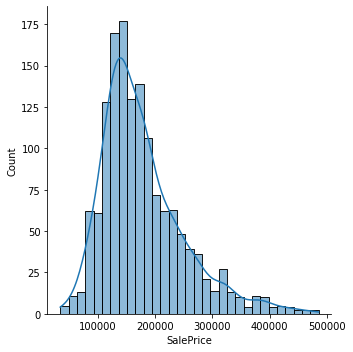

In [17]:
data = data.loc[data.SalePrice < 500000]
sns.displot(data.SalePrice, kde = True);

This made our distribution a little bit better, but let's try log normalization

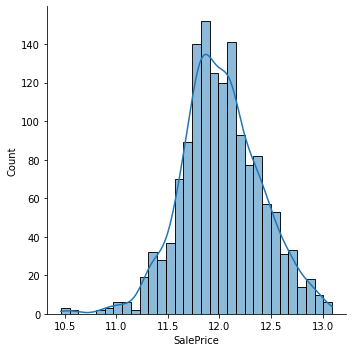

In [18]:
data.SalePrice = np.log(data.SalePrice)
sns.displot(data.SalePrice, kde = True);

I think this is the best we can do with the distribution